In [ ]:
import numpy as np
import matplotlib.pyplot as plt

: 

In [2]:
# drift coefficient
mu = 0
# number of steps
n = 100
# time in years
T = 1
# number of simulations
M = 100
# initial stock price
S0 = 100
# volatility
sigma = 0.018179

In [5]:
# calculate each time step
dt = T/n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma**2/2)*dt
    + sigma*np.random.normal(0, np.sqrt(dt), size = (M,n)).T
)
# include array of 1's
St = np.vstack([np.ones(M), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis = 0)
St = S0*St.cumprod(axis=0)

In [7]:
# Define time interval correctly
time = np.linspace(0, T, n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value = time).T

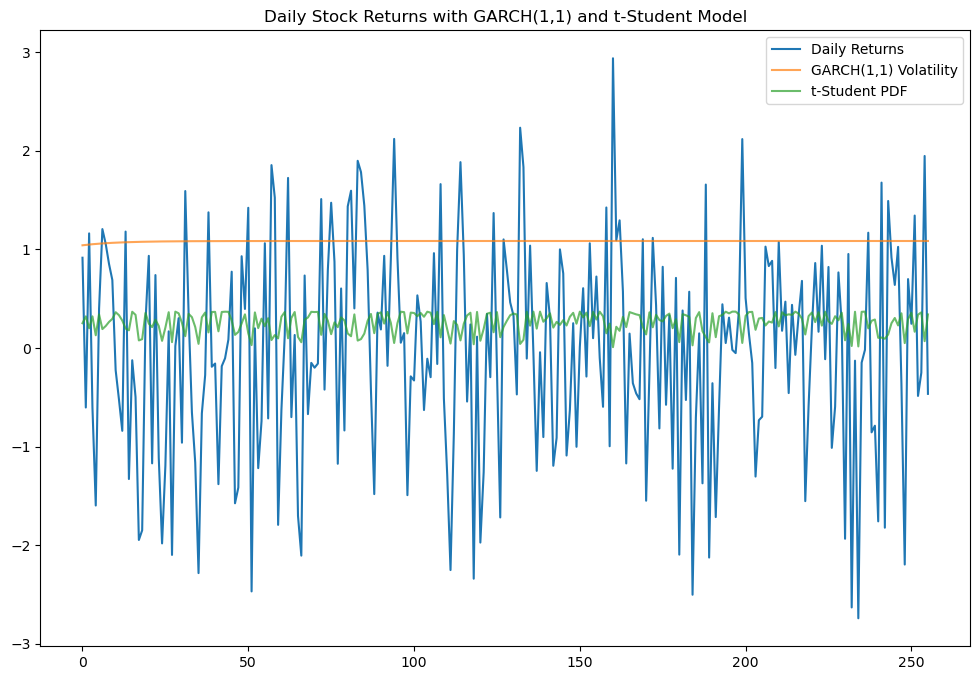

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import t

# Simulating daily stock returns for one year (approx. 256 trading days)
np.random.seed(69)  # for reproducibility
simulated_returns = np.random.normal(0, 1, 256)  # mean 0, std 1

# Fitting GARCH(1,1) model
garch_model = arch_model(simulated_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
garch_volatility = garch_fit.conditional_volatility

# Fitting t-Student model
df, loc, scale = t.fit(simulated_returns)
t_distribution = t.pdf(simulated_returns, df, loc, scale)

# Creating a DataFrame for plotting
data = pd.DataFrame({
    'Returns': simulated_returns,
    'GARCH Volatility': garch_volatility,
    't-Student PDF': t_distribution
})

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(data['Returns'], label='Daily Returns')
plt.plot(data['GARCH Volatility'], label='GARCH(1,1) Volatility', alpha=0.7)
plt.plot(data['t-Student PDF'], label='t-Student PDF', alpha=0.7)
plt.title('Daily Stock Returns with GARCH(1,1) and t-Student Model')
plt.legend()
plt.show()


In [4]:
!pip install arch scipy

Defaulting to user installation because normal site-packages is not writeable


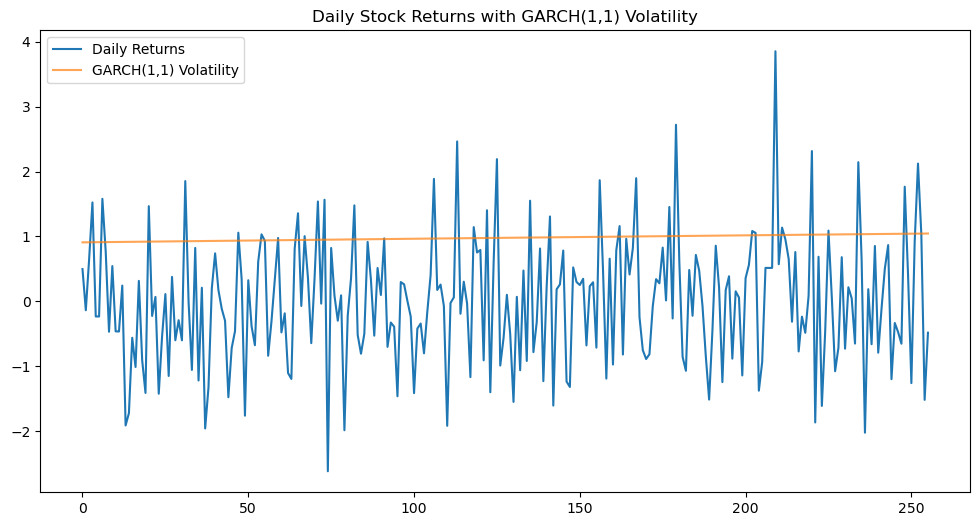

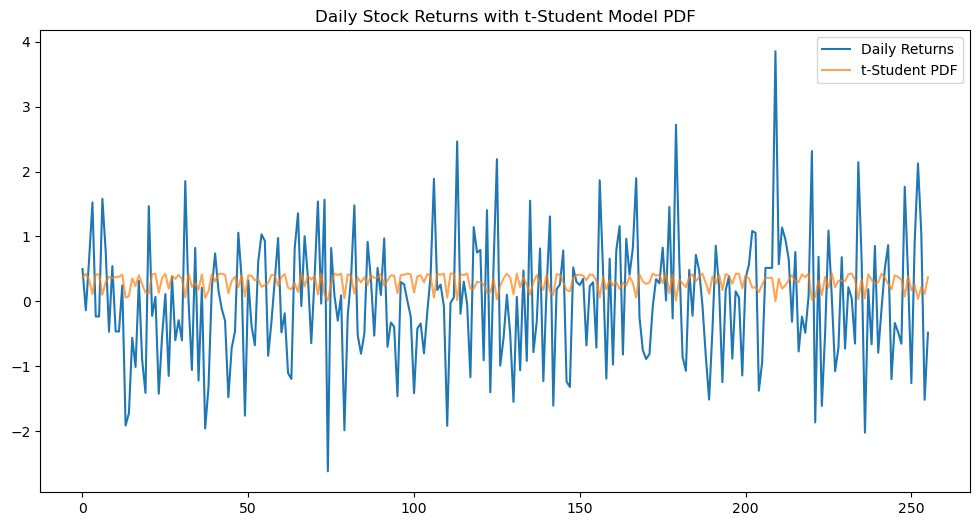

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import t

# Simulating daily stock returns for one year (approx. 256 trading days)
np.random.seed(42)  # for reproducibility
simulated_returns = np.random.normal(0, 1, 256)  # mean 0, std 1

# Fitting GARCH(1,1) model
garch_model = arch_model(simulated_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
garch_volatility = garch_fit.conditional_volatility

# Fitting t-Student model
df, loc, scale = t.fit(simulated_returns)
t_distribution = t.pdf(simulated_returns, df, loc, scale)

# Plotting GARCH(1,1) Model
plt.figure(figsize=(12, 6))
plt.plot(simulated_returns, label='Daily Returns')
plt.plot(garch_volatility, label='GARCH(1,1) Volatility', alpha=0.7)
plt.title('Daily Stock Returns with GARCH(1,1) Volatility')
plt.legend()
plt.show()

# Plotting t-Student Model
plt.figure(figsize=(12, 6))
plt.plot(simulated_returns, label='Daily Returns')
plt.plot(t_distribution, label='t-Student PDF', alpha=0.7)
plt.title('Daily Stock Returns with t-Student Model PDF')
plt.legend()
plt.show()


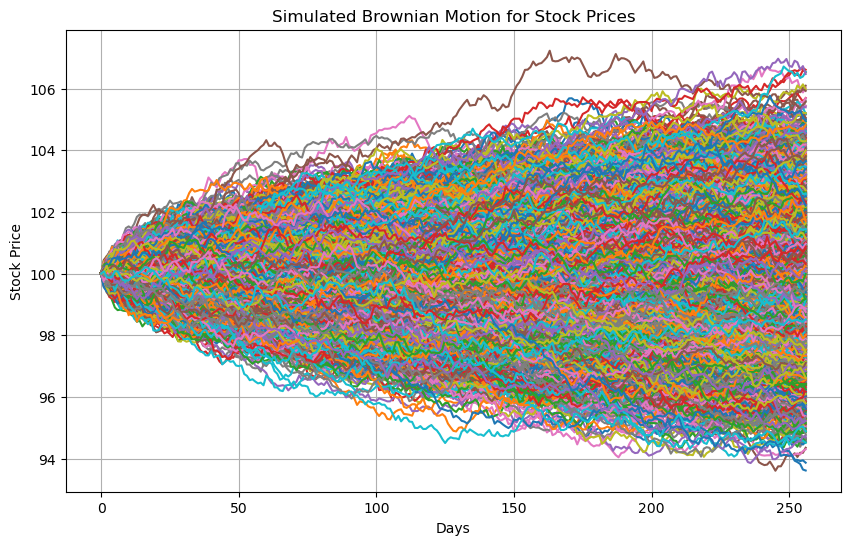

(-0.041883611564775214, -0.047250267119563504)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 10000  # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

VaR_1, ES


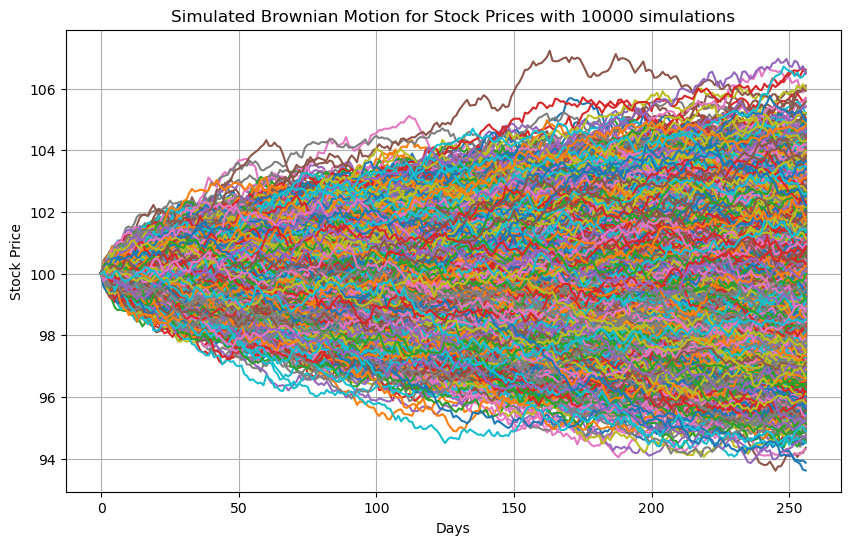

(-0.041883611564775214, -0.047250267119563504)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 10000  # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices with 10000 simulations")
plt.xlabel("Days")
plt.ylabel("Stock Price") 
plt.grid(True)
plt.show()

VaR_1, ES


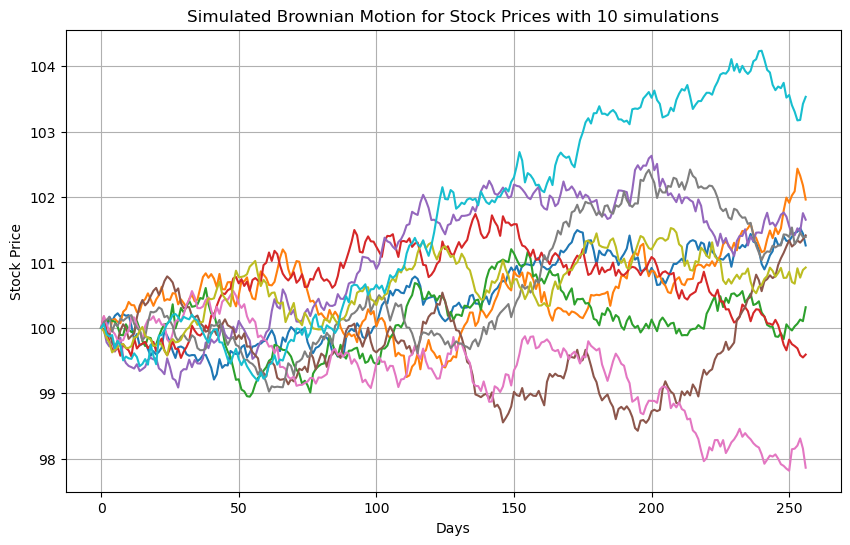

(-0.01983307207199673, -0.02139019621150684)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 10 # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices with 10 simulations")
plt.xlabel("Days")
plt.ylabel("Stock Price") 
plt.grid(True)
plt.show()

VaR_1, ES


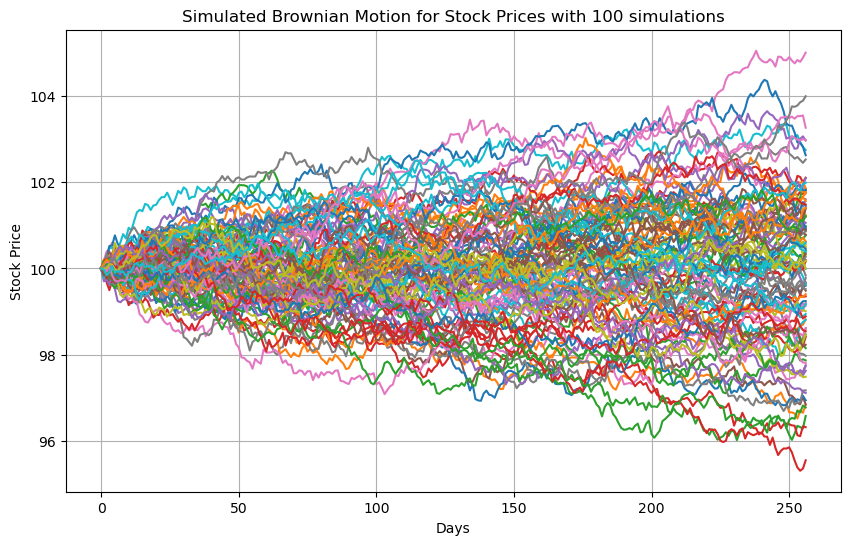

(-0.03686214929446814, -0.04446516069486406)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 100 # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices with 100 simulations")
plt.xlabel("Days")
plt.ylabel("Stock Price") 
plt.grid(True)
plt.show()

VaR_1, ES


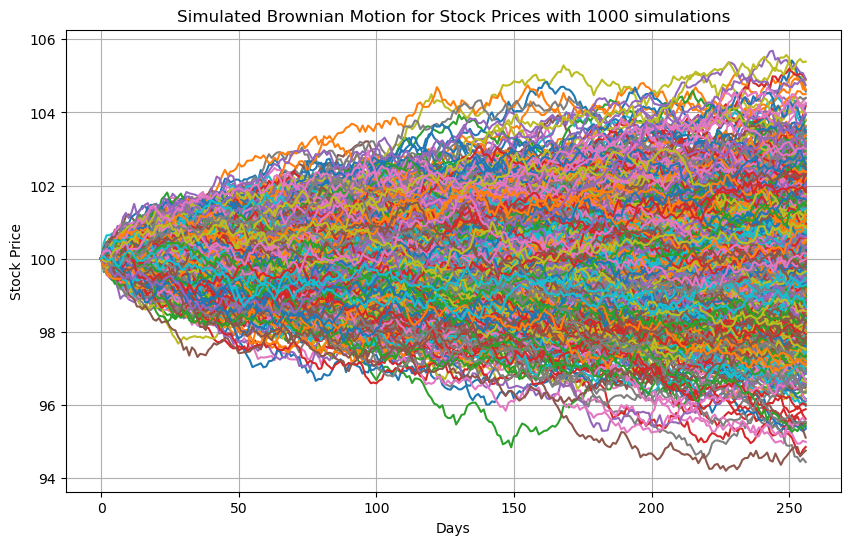

(-0.04476750239162466, -0.048746045627137656)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 1000 # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices with 1000 simulations")
plt.xlabel("Days")
plt.ylabel("Stock Price") 
plt.grid(True)
plt.show()

VaR_1, ES


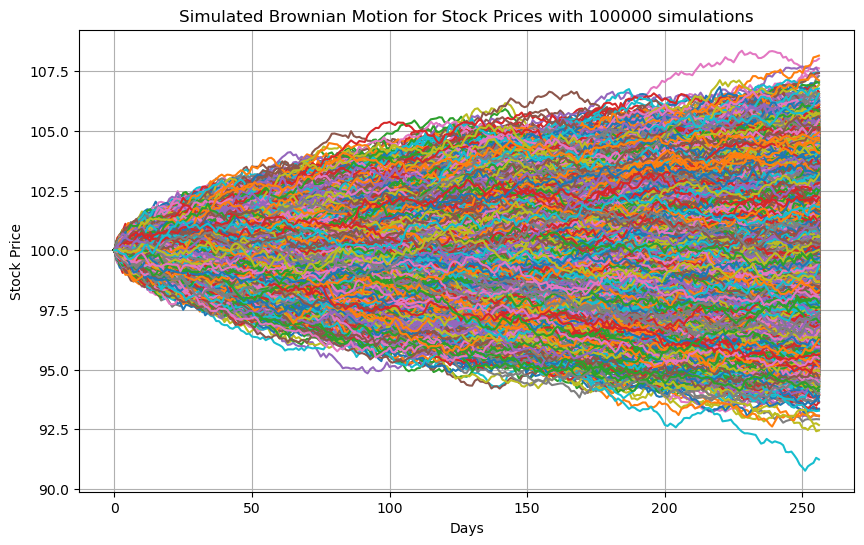

(-0.04175790949116209, -0.047367256555808666)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Constants
mu = 0  # drift
sigma = 0.018179  # volatility
S0 = 100  # initial stock price
days = 256  # number of business days in a year
simulations = 100000 # number of simulations

# Time step
dt = 1/days

# Simulating Brownian motion
np.random.seed(42)  # for reproducibility
price_paths = np.zeros((days + 1, simulations))
price_paths[0] = S0

for t in range(1, days + 1):
    price_paths[t] = price_paths[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(simulations))

# Calculate the final returns
returns = price_paths[-1] / S0 - 1

# Calculating Value at Risk (VaR) at 1%
VaR_1 = np.percentile(returns, 1)

# Calculating Expected Shortfall (ES)
ES = returns[returns <= VaR_1].mean()

# Plotting the Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(price_paths)
plt.title("Simulated Brownian Motion for Stock Prices with 100000 simulations")
plt.xlabel("Days")
plt.ylabel("Stock Price") 
plt.grid(True)
plt.show()

VaR_1, ES
